Una empresa de retail quiere segmentar a sus clientes según sus ingresos anualesy nivel de gasto, con el fin de diseñar campañas de marketing personalizadas. Para ello, aplicamos el algoritmo de K-Means.

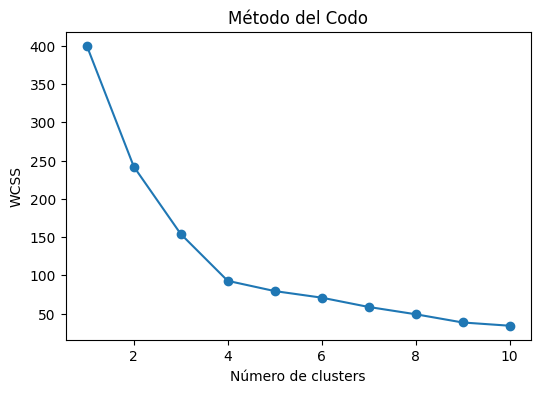

Silhouette Score: 0.401


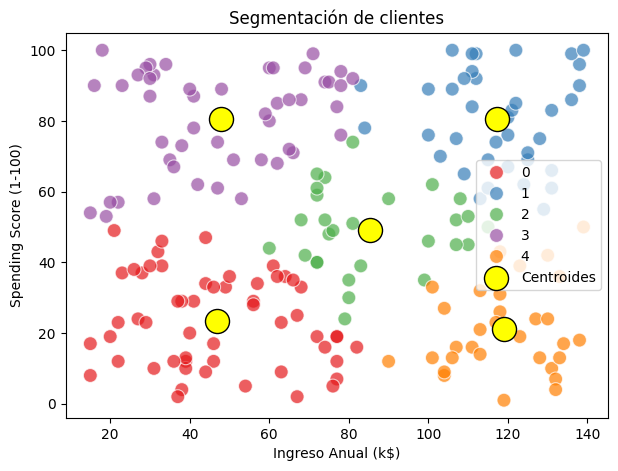

In [ ]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Generar dataset simulado
np.random.seed(42)
n = 200
dataset = pd.DataFrame({
    "CustomerID": np.arange(1, n+1),
    "Genre": np.random.choice(["Male", "Female"], n),
    "Age": np.random.randint(18, 70, n),
    "Annual Income (k$)": np.random.randint(15, 140, n),
    "Spending Score (1-100)": np.random.randint(1, 101, n)
})

# Usamos Ingreso Anual y Spending Score
X = dataset.iloc[:, [3, 4]].values

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 2. Método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show()


# 3. Entrenar modelo K-Means (5 clusters)
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
labels = kmeans.fit_predict(X_scaled)

dataset["Cluster"] = labels

# Validación con Silhouette
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")

# 4. Visualización
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X[:,0], y=X[:,1], hue=labels, palette="Set1", s=100, alpha=0.7
)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:,0],
    scaler.inverse_transform(kmeans.cluster_centers_)[:,1],
    c="yellow", s=300, label="Centroides", edgecolors="black"
)
plt.title("Segmentación de clientes")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

El análisis con K-Means permitió identificar 5 segmentos de clientes bien diferenciados según
su ingreso anual y nivel de gasto. Esta segmentación ofrece a la empresa una visión clara de los 
distintos perfiles de consumidores:

- Clientes con ingresos bajos y bajo gasto.  
- Clientes con ingresos bajos y alto gasto.  
- Clientes con ingresos medios y gasto moderado.  
- Clientes con ingresos altos y bajo gasto.  
- Clientes con ingresos altos y alto gasto.  

Con esta información, la empresa puede diseñar estrategias de marketing personalizadas para 
cada grupo, optimizando recursos y aumentando la efectividad de sus campañas.